Index(['longitude', 'latitude', 'start_date', 'end_date', 'source',
       'horizon_lower', 'horizon_upper', 'aluminium_extractable',
       'boron_extractable', 'calcium_extractable', 'carbon_organic',
       'carbon_total', 'copper_extractable', 'electrical_conductivity',
       'iron_extractable', 'magnesium_extractable', 'manganese_extractable',
       'nitrogen_total', 'ph', 'phosphorus_extractable',
       'potassium_extractable', 'sodium_extractable', 'sulphur_extractable',
       'zinc_extractable'],
      dtype='object')
   longitude  latitude  start_date    end_date  \
0   35.18756  -8.62390  01/01/2008  31/12/2018   
1   35.18558  -8.62300  01/01/2008  31/12/2018   
2   35.18579  -8.62221  01/01/2008  31/12/2018   
3   35.18266  -8.62177  01/01/2008  31/12/2018   
4   35.12984  -8.62005  01/01/2008  31/12/2018   

                                              source  horizon_lower  \
0  afsis_spectral https://www.isda-africa.com/pos...             50   
1  afsis_spectral htt

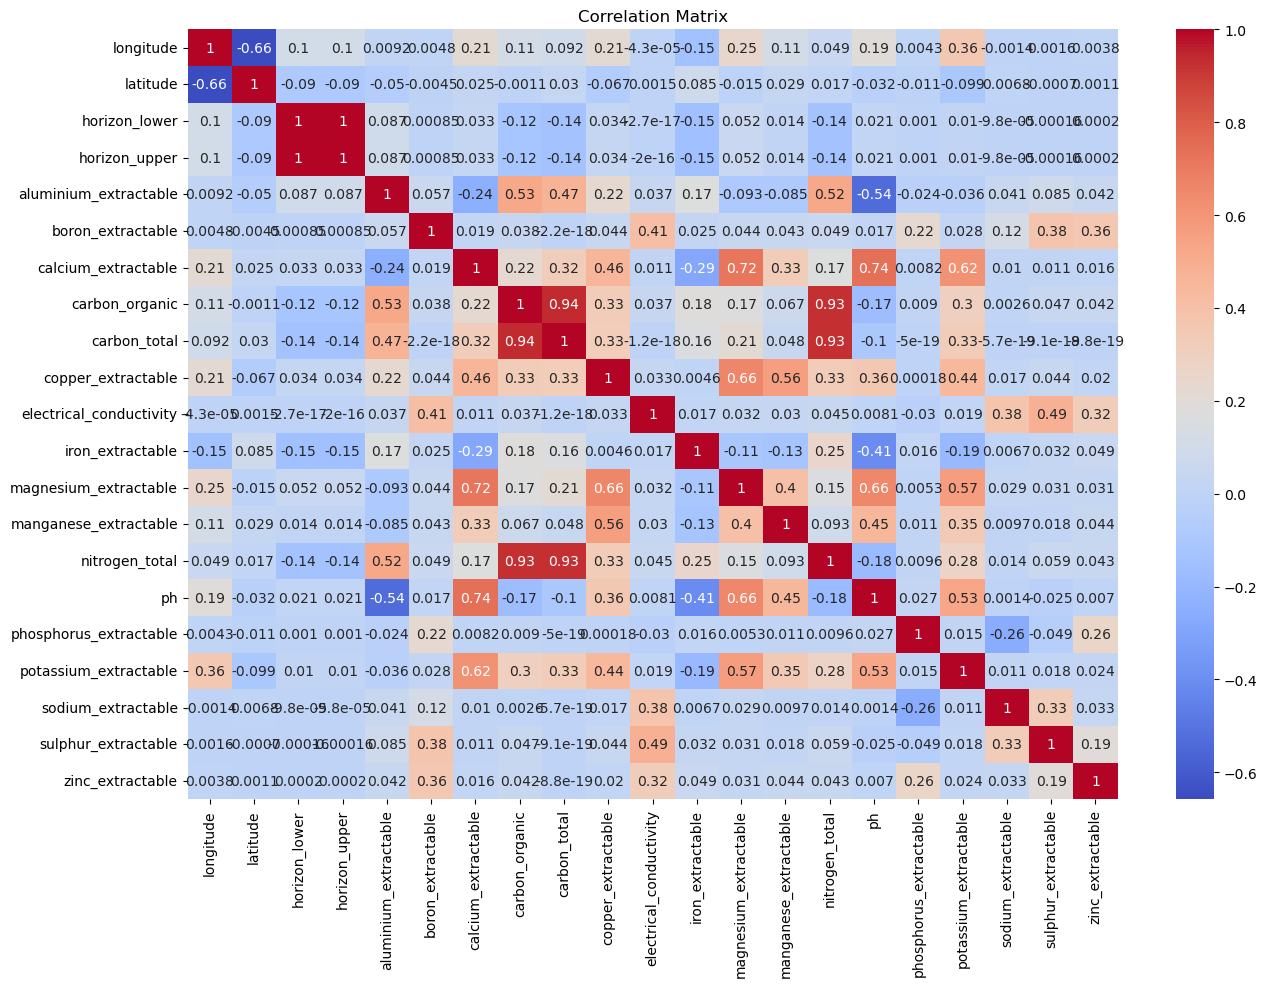

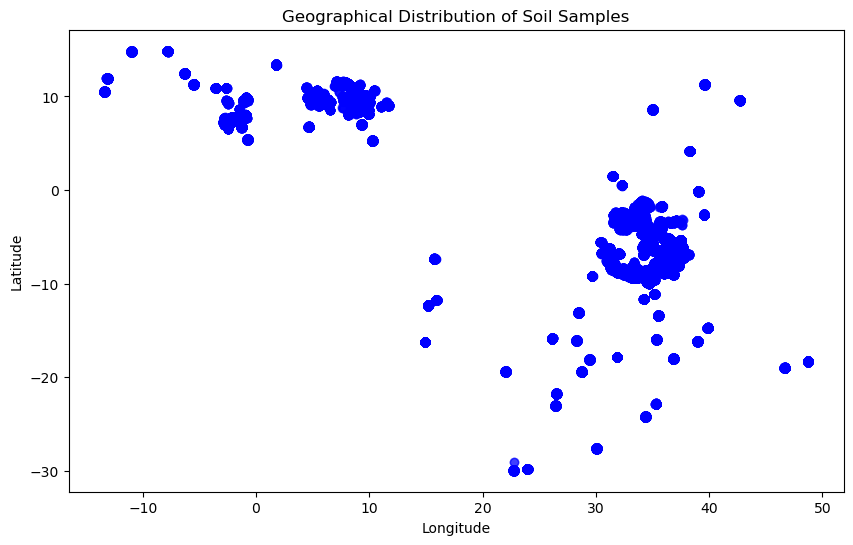

                                                    longitude  latitude  \
source                                                                    
afsis_spectral https://www.isda-africa.com/post...  27.139748 -4.869112   
afsis_wetchem https://www.isda-africa.com/posts...   8.165171  9.439830   

                                                   start_date   end_date  \
source                                                                     
afsis_spectral https://www.isda-africa.com/post... 2008-01-01 2018-12-31   
afsis_wetchem https://www.isda-africa.com/posts... 2008-01-01 2018-12-31   

                                                    horizon_lower  \
source                                                              
afsis_spectral https://www.isda-africa.com/post...      34.323107   
afsis_wetchem https://www.isda-africa.com/posts...      20.319889   

                                                    horizon_upper  \
source                                          

/Users/ofidohubvm/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross-Validation RMSE Scores: [1.91993713 1.4265122  1.07376649 1.18383531 5.92450644]
Average Cross-Validation RMSE: 2.305711514679485


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Define file paths
csv_file_path = 'Africansoil/AtonixAgro-Africa-soil-analysis.csv'

# Load the CSV file with the correct delimiter
csv_data = pd.read_csv(csv_file_path, delimiter='|')
print(csv_data.columns)
print(csv_data.head())
print(csv_data.describe())
print(csv_data.isnull().sum())

# Data cleaning
csv_data_cleaned = csv_data.dropna()
csv_data_filled = csv_data.fillna(0)

# Convert date columns to datetime with dayfirst=True
csv_data['start_date'] = pd.to_datetime(csv_data['start_date'], dayfirst=True)
csv_data['end_date'] = pd.to_datetime(csv_data['end_date'], dayfirst=True)

# Identify numeric columns
numeric_cols = csv_data.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with the mean of each numeric column
csv_data_filled = csv_data.copy()
csv_data_filled[numeric_cols] = csv_data[numeric_cols].fillna(csv_data[numeric_cols].mean())

# Drop rows with missing values
csv_data_dropped = csv_data.dropna()

# Feature Engineering
csv_data_filled['duration_days'] = (csv_data_filled['end_date'] - csv_data_filled['start_date']).dt.days

# Exploratory Data Analysis
plt.figure(figsize=(15, 10))
sns.heatmap(csv_data_filled[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(csv_data_filled['longitude'], csv_data_filled['latitude'], c='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Soil Samples')
plt.show()

# Group By Analysis
group_by_source = csv_data_filled.groupby('source').mean()
print(group_by_source)

# Machine Learning
# Drop non-numeric columns
X = csv_data_filled.drop(['carbon_organic', 'start_date', 'end_date', 'source'], axis=1)
y = csv_data_filled['carbon_organic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print(f'Cross-Validation RMSE Scores: {cv_rmse_scores}')
print(f'Average Cross-Validation RMSE: {cv_rmse_scores.mean()}')